In [55]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

print(keras.__version__)

2.11.0
2.11.0


In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [57]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [58]:
X_train_full.shape

(60000, 28, 28)

Each pixel intensity is represented as a byte (0 to 255):

In [59]:
X_train_full.dtype

dtype('uint8')

* Podzielmy pełny zestaw treningowy na zestaw walidacyjny i zestaw treningowy. 
* Kolor pikseli skalujemy również do zakresu 0-1 i przekształcamy na zmiennoprzecinkowe, dzieląc przez 255.

In [60]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

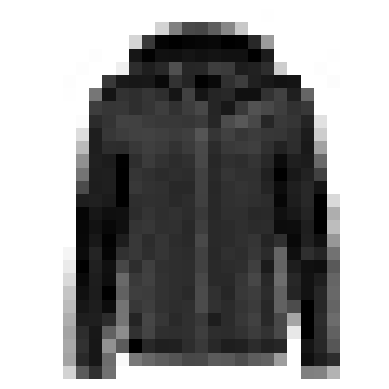

In [61]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [77]:
print(X_test.shape)
print(X_train.shape)
print(y_test.shape)
print(y_train.shape)

(10000, 28, 28)
(55000, 28, 28)
(10000,)
(55000,)


Będziemy używać klas numerycznych i nazw.

In [63]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

class_names[y_train[0]]

'Coat'

Możemy narysować więcej przykładów treningowych.

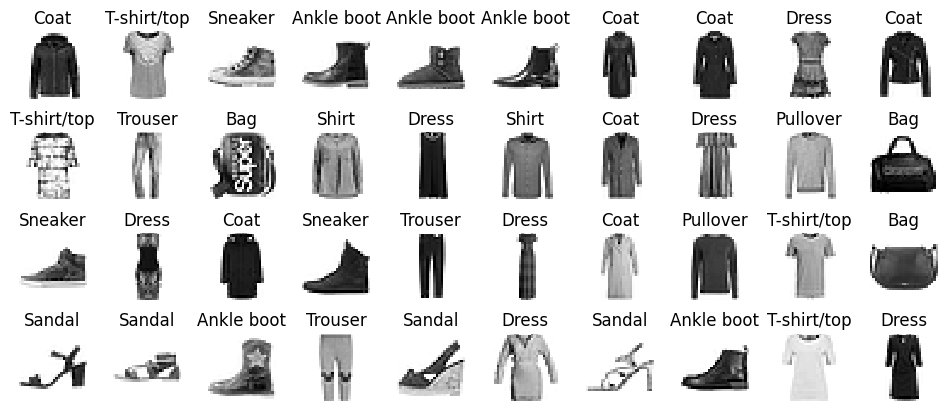

In [64]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

# Zad
Zbuduj i naucz sieć neuronową zgodnie z poniższym schematem. 

In [127]:
(None,X_train.shape[1],X_train.shape[2])

(None, 28, 28)

In [153]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import normalization
from tensorflow.keras.layers import Dense, BatchNormalization

from keras.callbacks import History

# history = History()
# model = Sequential()
# model.add(Dense(784,activation="sigmoid"))
# model.add(Dense(300,activation="sigmoid"))
# model.add(Dense(100,activation="sigmoid"))
# model.add(Dense(10,activation="sigmoid"))

# model.build(X_train.shape)
# model.summary()

# model = keras.models.Sequential([
#     keras.layers.Flatten(input_shape=[28, 28]),
#     keras.layers.Dense(300, activation="relu"),
#     model.add(BatchNormalization()),
# #     model.add(Activation("relu")),
# #     model.add(Dropout(0.3)),
#     keras.layers.Dense(100, activation="relu"),
#     model.add(BatchNormalization()),
# #     model.add(Activation("relu")),
# #     model.add(Dropout(0.3)),
#     keras.layers.Dense(10, activation="softmax")
# ])


keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)


model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="elu"),
    keras.layers.Dense(100, activation="elu"),
    keras.layers.Dense(50, activation="elu"),
    keras.layers.Dense(10, activation="softmax")
])
model.summary()
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="Adam",
              metrics=["accuracy"])
              
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
model.evaluate(X_test, y_test)
 

model.summary()
 

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 50)                5050      
                                                                 
 dense_3 (Dense)             (None, 10)                510       
                                                                 
Total params: 271,160
Trainable params: 271,160
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
1719/1719 [============================

In [154]:
hidden1 = model.layers[1]
print(hidden1.name)

weights, biases = hidden1.get_weights()

dense


In [155]:
weights

array([[ 0.3252437 ,  0.00112114,  0.35454115, ...,  0.05144636,
        -0.35509616,  0.11089588],
       [ 0.16363762,  0.2962911 ,  0.14266466, ...,  0.18299079,
        -0.03620816,  0.47522348],
       [-0.3192225 , -0.29532072,  0.01190732, ..., -0.45651898,
        -0.01699285,  0.03090086],
       ...,
       [-0.094367  , -0.09720014,  0.01914399, ...,  0.00393647,
         0.16999379,  0.17179957],
       [-0.00253898,  0.55499876,  0.05381177, ...,  0.23623972,
        -0.82107955,  0.28375834],
       [ 0.1797624 , -0.02200122,  0.5377945 , ..., -0.35345897,
        -0.17390403, -0.05123767]], dtype=float32)

In [156]:
print(weights.shape)

(784, 300)


In [157]:
biases

array([ 5.36699258e-02, -8.01309720e-02,  3.38969141e-01,  2.08806455e-01,
        5.66629507e-02, -6.47716597e-02, -1.57607242e-01, -3.87195438e-01,
        1.44185126e-01, -4.28866595e-01,  2.42564395e-01,  4.10410576e-02,
       -1.59890309e-01,  2.31621802e-01,  1.10331327e-01, -5.05861221e-03,
       -4.44066286e-01,  2.78574765e-01,  2.85377968e-02,  1.69009492e-01,
       -6.29170015e-02, -9.78650898e-02,  1.68127880e-01,  1.89630896e-01,
        3.06365997e-01,  2.89165407e-01, -1.47967026e-01,  2.44068757e-01,
        2.92239368e-01,  1.19884685e-01,  2.25607172e-01, -3.22620906e-02,
       -2.26846173e-01,  1.65149316e-01, -6.24219738e-02,  4.65301692e-01,
       -7.56488293e-02,  5.79024553e-02, -2.99826533e-01,  8.10573157e-03,
       -2.36186549e-01, -2.79728234e-01,  5.27375877e-01,  4.82777804e-02,
        2.46163964e-01,  2.51289189e-01,  7.87544101e-02,  2.64693737e-01,
       -1.01626739e-01,  3.16528559e-01, -1.54294312e-01,  1.21886559e-01,
       -2.94262975e-01, -

In [158]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

Mozna też uzyć w tej formie:

```python
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=[keras.metrics.sparse_categorical_accuracy])
```

1719/1719 [==============================] - 3s 2ms/step - loss: 0.0934 - accuracy: 0.9650 - val_loss: 0.4129 - val_accuracy: 0.8991
Epoch 6/100
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0912 - accuracy: 0.9653 - val_loss: 0.4235 - val_accuracy: 0.8991
Epoch 7/100
1719/1719 [==============================] - 3s 1ms/step - loss: 0.0891 - accuracy: 0.9663 - val_loss: 0.4255 - val_accuracy: 0.8987
Epoch 8/100
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0874 - accuracy: 0.9671 - val_loss: 0.4304 - val_accuracy: 0.8976
Epoch 9/100
 595/1719 [=========>....................] - ETA: 1s - loss: 0.0853 - accuracy: 0.9672

In [160]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 1719}

In [161]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


In [162]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

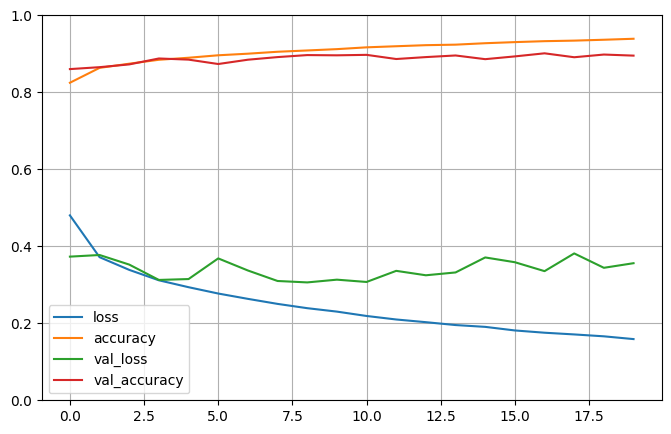

In [163]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [164]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 848us/step - loss: 0.4396 - accuracy: 0.8978


[0.4396103620529175, 0.8978000283241272]

In [165]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 69ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

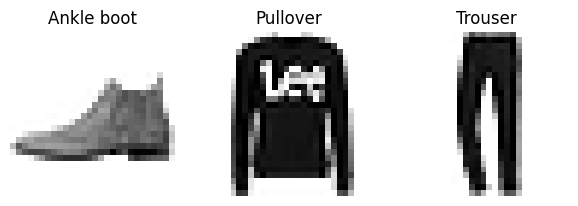

In [168]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()